In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
celestialNames = ['Sun', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
celestialPosition = {}
celestialVelocity = {}
celestialDistance = {}

nCelestials = len(celestialNames)
for i in range(nCelestials):
    df = pd.read_csv(f"Data\\planetPositions\\{celestialNames[i]}.csv", header=None)
    array = np.array(df)
    celestialPosition[celestialNames[i]] = array[1:]

    if i == 0:
        celestialVelocity[celestialNames[i]] = np.linalg.norm(array[1:] - array[:-1], axis=1)
        celestialDistance[celestialNames[i]] = np.linalg.norm(array[1:], axis=1)

    else:
        celestialVelocity[celestialNames[i]] = np.linalg.norm(array[1:] - array[:-1], axis=1)
        celestialDistance[celestialNames[i]] = np.linalg.norm(array[1:] - celestialPosition['Sun'], axis=1)

celestialColors = {"Sun": "yellow",
                "Mercury": "gray",
                "Venus": "khaki",
                "Earth": "blue",
                "Mars": "red",
                "Jupiter": "darkorange",
                "Saturn": "gold",
                "Uranus": "lightskyblue",
                "Neptune": "royalblue"}

N = celestialPosition[celestialNames[i]][:, 0].size

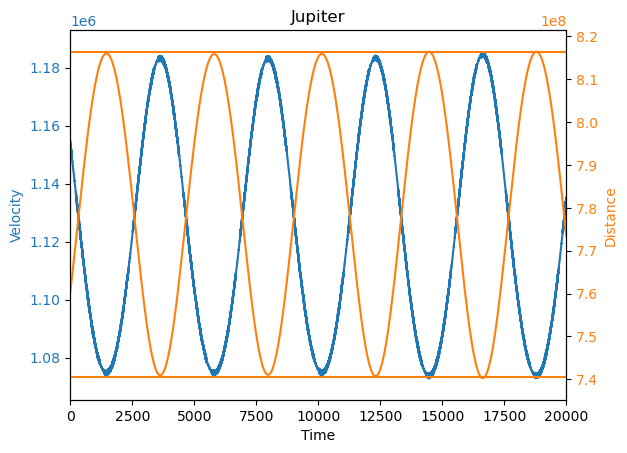

In [5]:
fig, ax1 = plt.subplots()
ax1.set_title("Jupiter")

ax1.plot(range(N), celestialVelocity["Jupiter"], color='tab:blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Velocity', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(range(N), celestialDistance["Jupiter"], color='tab:orange')
ax2.set_ylabel('Distance', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.hlines([816.363e6, 740.595e6], 0, 20000, color='tab:orange')
ax2.set_xlim(0, 20000)

plt.show()

# According to Kepler's laws the the velocity should be at it highest when the planet is closest to the Sun.
# We also expect the distance to oscillate between the known aphelion and perihelion of the planet.